In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from nsepy import get_history as gh 
import datetime as dt


In [1]:
#start = dt.datetime(2013, 1, 1)
#end = dt.datetime(2021, 12, 28)
#stk_data =gh(symbol='F:\malathi\AI\Time_series\Tatacoffee13_21.xlsx',start=start,end=end)

In [4]:
df = pd.read_excel('F:/malathi/AI/Time_series/Tatacoffee13_21.xlsx')
print(df.shape)
print(df.head())

(2225, 5)
        Date     Open     High      Low    Close
0 2013-01-01  1410.60  1427.90  1408.30  1415.10
1 2013-01-02  1421.00  1626.60  1416.15  1607.40
2 2013-01-03  1632.55  1673.90  1613.05  1626.20
3 2013-01-04  1627.75  1627.75  1574.60  1579.05
4 2013-01-07  1580.00  1639.50  1565.50  1595.65


In [5]:
df

,Date,Open,High,Low,Close
0,2013-01-01,1410.60,1427.90,1408.30,1415.10
1,2013-01-02,1421.00,1626.60,1416.15,1607.40
2,2013-01-03,1632.55,1673.90,1613.05,1626.20
3,2013-01-04,1627.75,1627.75,1574.60,1579.05
4,2013-01-07,1580.00,1639.50,1565.50,1595.65
...,...,...,...,...,...
2220,2021-12-22,202.90,207.80,201.35,205.00
2221,2021-12-23,206.00,206.85,202.05,202.95
2222,2021-12-24,203.90,203.90,199.35,201.00
2223,2021-12-27,200.00,222.00,196.00,218.35


In [6]:
print(df['Date'].head())
print(df['Date'].dtype)

0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: Date, dtype: datetime64[ns]
datetime64[ns]


In [7]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
print(df['Date'].head())

0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: Date, dtype: datetime64[ns]


In [8]:
start = dt.datetime(2013, 1, 1)
end = dt.datetime(2021, 12, 28)

stk_data = df[(df['Date'] >= start) & (df['Date'] <= end)]
print(stk_data.shape)
print(stk_data.head())

(2225, 5)
        Date     Open     High      Low    Close
0 2013-01-01  1410.60  1427.90  1408.30  1415.10
1 2013-01-02  1421.00  1626.60  1416.15  1607.40
2 2013-01-03  1632.55  1673.90  1613.05  1626.20
3 2013-01-04  1627.75  1627.75  1574.60  1579.05
4 2013-01-07  1580.00  1639.50  1565.50  1595.65


In [9]:
stk_data=stk_data[["Open","High","Low","Close"]]


In [10]:
column="Close"

In [11]:
print(stk_data.shape)


(2225, 4)


In [12]:
print(stk_data[[column]].dropna().shape)

(2225, 1)


In [13]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (2225, 1)


In [14]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

2114
X_train length: (2114, 1)
X_test length: (111, 1)
y_train length: (2114, 1)
y_test length: (111, 1)


In [15]:
pip install stockFunctions

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement stockFunctions (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Hp\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for stockFunctions


In [16]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
orders=[(0,0,1),(0,0,2)]
from statsmodels.tsa.arima.model import ARIMA
for td in trends:
        
        #print(td)
        #trendslist.append(td)
    model = ARIMA(X_train, order=(0,0,10),trend=td,)
    model_fit = model.fit()
        # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
    from sklearn.metrics import r2_score
    mse=mean_squared_error(y_test,y_pred,squared=False)
    from stockFunctions import rmsemape
    print("Trend={}".format(td))
    rmsemape(y_test,y_pred)
    print("************")

Trend=n
RMSE-Testset: 0.09849683740066696
maPe-Testset: 0.9637503282825532
************
Trend=t
RMSE-Testset: 0.008637144286805096
maPe-Testset: 0.07566379615377375
************
Trend=c
RMSE-Testset: 0.08293434077781214
maPe-Testset: 0.8142493418001728
************
Trend=ct
RMSE-Testset: 0.28318231487890116
maPe-Testset: 2.8201519022512485
************


C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
len(y_pred)

111

In [18]:
td="c"
model = ARIMA(X_train, order=(0,0,30),trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Trend={}".format(td))
rmsemape(y_test,y_pred)
print("************")

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Trend=c
RMSE-Testset: 0.07904349608743631
maPe-Testset: 0.750305824546209
************


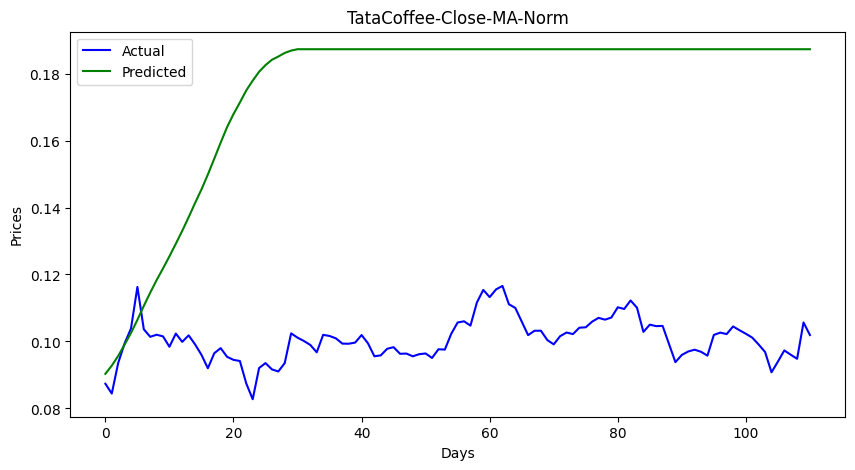

In [19]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-MA-Norm","Days","Prices")

In [20]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [21]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

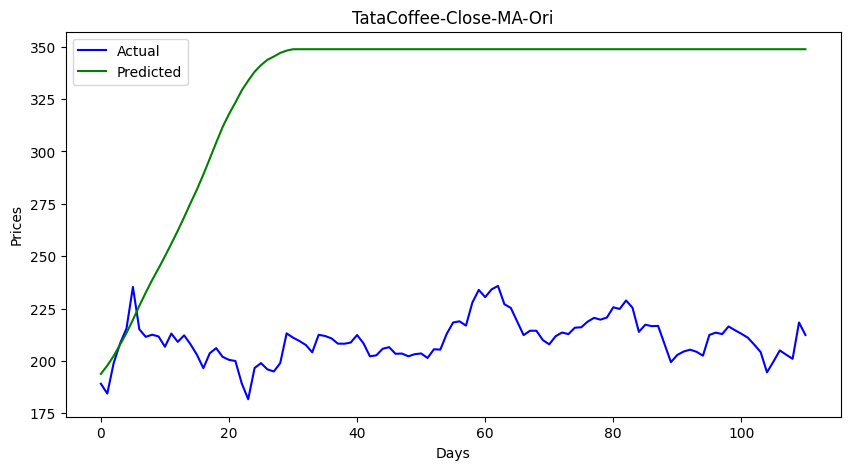

In [22]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-MA-Ori","Days","Prices")

In [23]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 126.37474154459319
maPe-Testset: 0.5728225641781173


In [24]:
forecast=model_fit.predict(len(data1), len(data1))
forecast

array([0.18728125])

In [25]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [26]:
forecast_stock_price_test_oriF

,Closefore
0,348.82527


In [27]:
forecast_stock_price_test_oriF.to_csv("CloseMA.csv",index=False)